# << FILL IN: DATASET TYPE >> Test Set << FILL IN: DATE >>
## Model Classification  Report

This is a classification report to highlight i) how the model is trained and ii) the performance on the test set

#### Keypoints:
- Classifier test accuracy: << ACC >>

#### Quicklinks:

test_data = << FILL IN: CSV PATH >>

model_weights = << FILL IN: MODEL DIR >>

### Table of Contents:

1. [Training_and_Validation](#1.-Training-and-Validation)

1.1 [Train/Val dataset statistics](#1.1-Train/Val-dataset-statistics)

1.2 [Model information](#1.2-Model-information)

1.3 [Model performance on Train/Val dataset](##1.3-Model-performance-on-Train/Val-dataset)

2. [Evaluated Test Data](#2.-Evaluated-Test-Data)

2.1 [Test dataset statistics](#2.1-Test-dataset-statistics)

2.2 [Model Performance on Test dataset](##2.2-Model-Performance-on-Test-dataset)

2.2.1 [Quantitative Results](#2.2.1-Quantitative-Results)

2.2.2 [Qualitative Results](#2.2.2-Qualitative-Results)

3. [Conclusions](#3.-Conclusions)

In [32]:
# Code to initialize report
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import os
from pprint import pformat

#Use printmd instead of print
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
sys.path.insert(0, str(Path('__file__').resolve().parents[2]))

from utils.report_generator import ReportGenerator
model_path = '/data6/plankton_test_db_new/model/20191027/18:03:15/'
pred_path_with = '/data6/plankton_test_db_new/predictions_20191203173329_mapped.csv'
report = ReportGenerator(csv_fname=pred_path_with,model_path=model_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Training and Validation

## 1.1 Train/Val dataset statistics

In [33]:
report.show_dataset_statistics()


*********************************** Dataset ************************************
Idx. Cls					TrainImageCount		ValImageCount
 1. Acantharea                                          1352		  339
 2. Akashiwo                                            1270		  318
 3. Ceratium falcatiforme or fusus                      1224		  306
 4. Ceratium furca                                       952		  238
 5. Ceratium other                                       911		  228
 6. Chaetoceros socialis                                 660		  165
 7. Chattonella                                          648		  163
 8. Ciliates                                             585		  147
 9. Cochlodinium                                         522		  131
10. Dinophysis                                           513		  129
11. Eucampia                                             492		  124
12. Gyrodinium                                           491		  123
13. Lingulodinium polyedra                               4

#### Notes:
<< FILL IN: IF NECESSARY >>

## 1.2 Model information

#### Architecture
- model: << FILL IN: ARCHITECTURE >>
- optimizer: << FILL IN: OPTIMIZER >>
- loss: << FILL IN: LOSS >>

#### Data Augmentation
- << FILL IN: >>
- << FILL IN: >>
- << FILL IN: >>
- << FILL IN: >>

#### Hyperparameters
- batch size: << FILL IN: >>
- learning rate: << FILL IN: >>
- total epochs: << FILL IN: >>

#### Notes:
<< FILL IN: IF NECESSARY >>

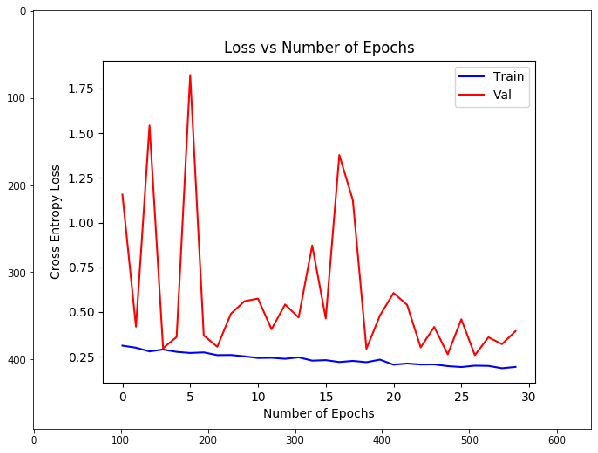

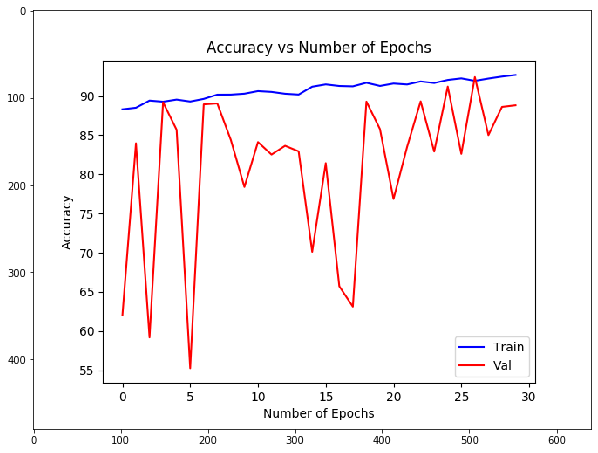

In [34]:
report.show_loss_graph(); report.show_acc_graph()

## 1.3 Model performance on Train/Val dataset

**Training Accuracy:** << FILL IN: TRAIN ACC >> 

**Validation Accuracy:** << FILL IN: VAL ACC >>

### Validation Set Confusion Matrix Analysis
#### How to read confusion matrix
X axis - Predicted label; Y axis - True label
Confusion matrix is presented in the percentage.

This model is trained upon the classes that were listed above under section 1.1 [Train/Val dataset statistics](#1.1-Train/Val-dataset-statistics)

#### Analysis
<< FILL IN: >>
- Two lowest: << FILL IN: >>
- Classes > 99%: << FILL IN: >>



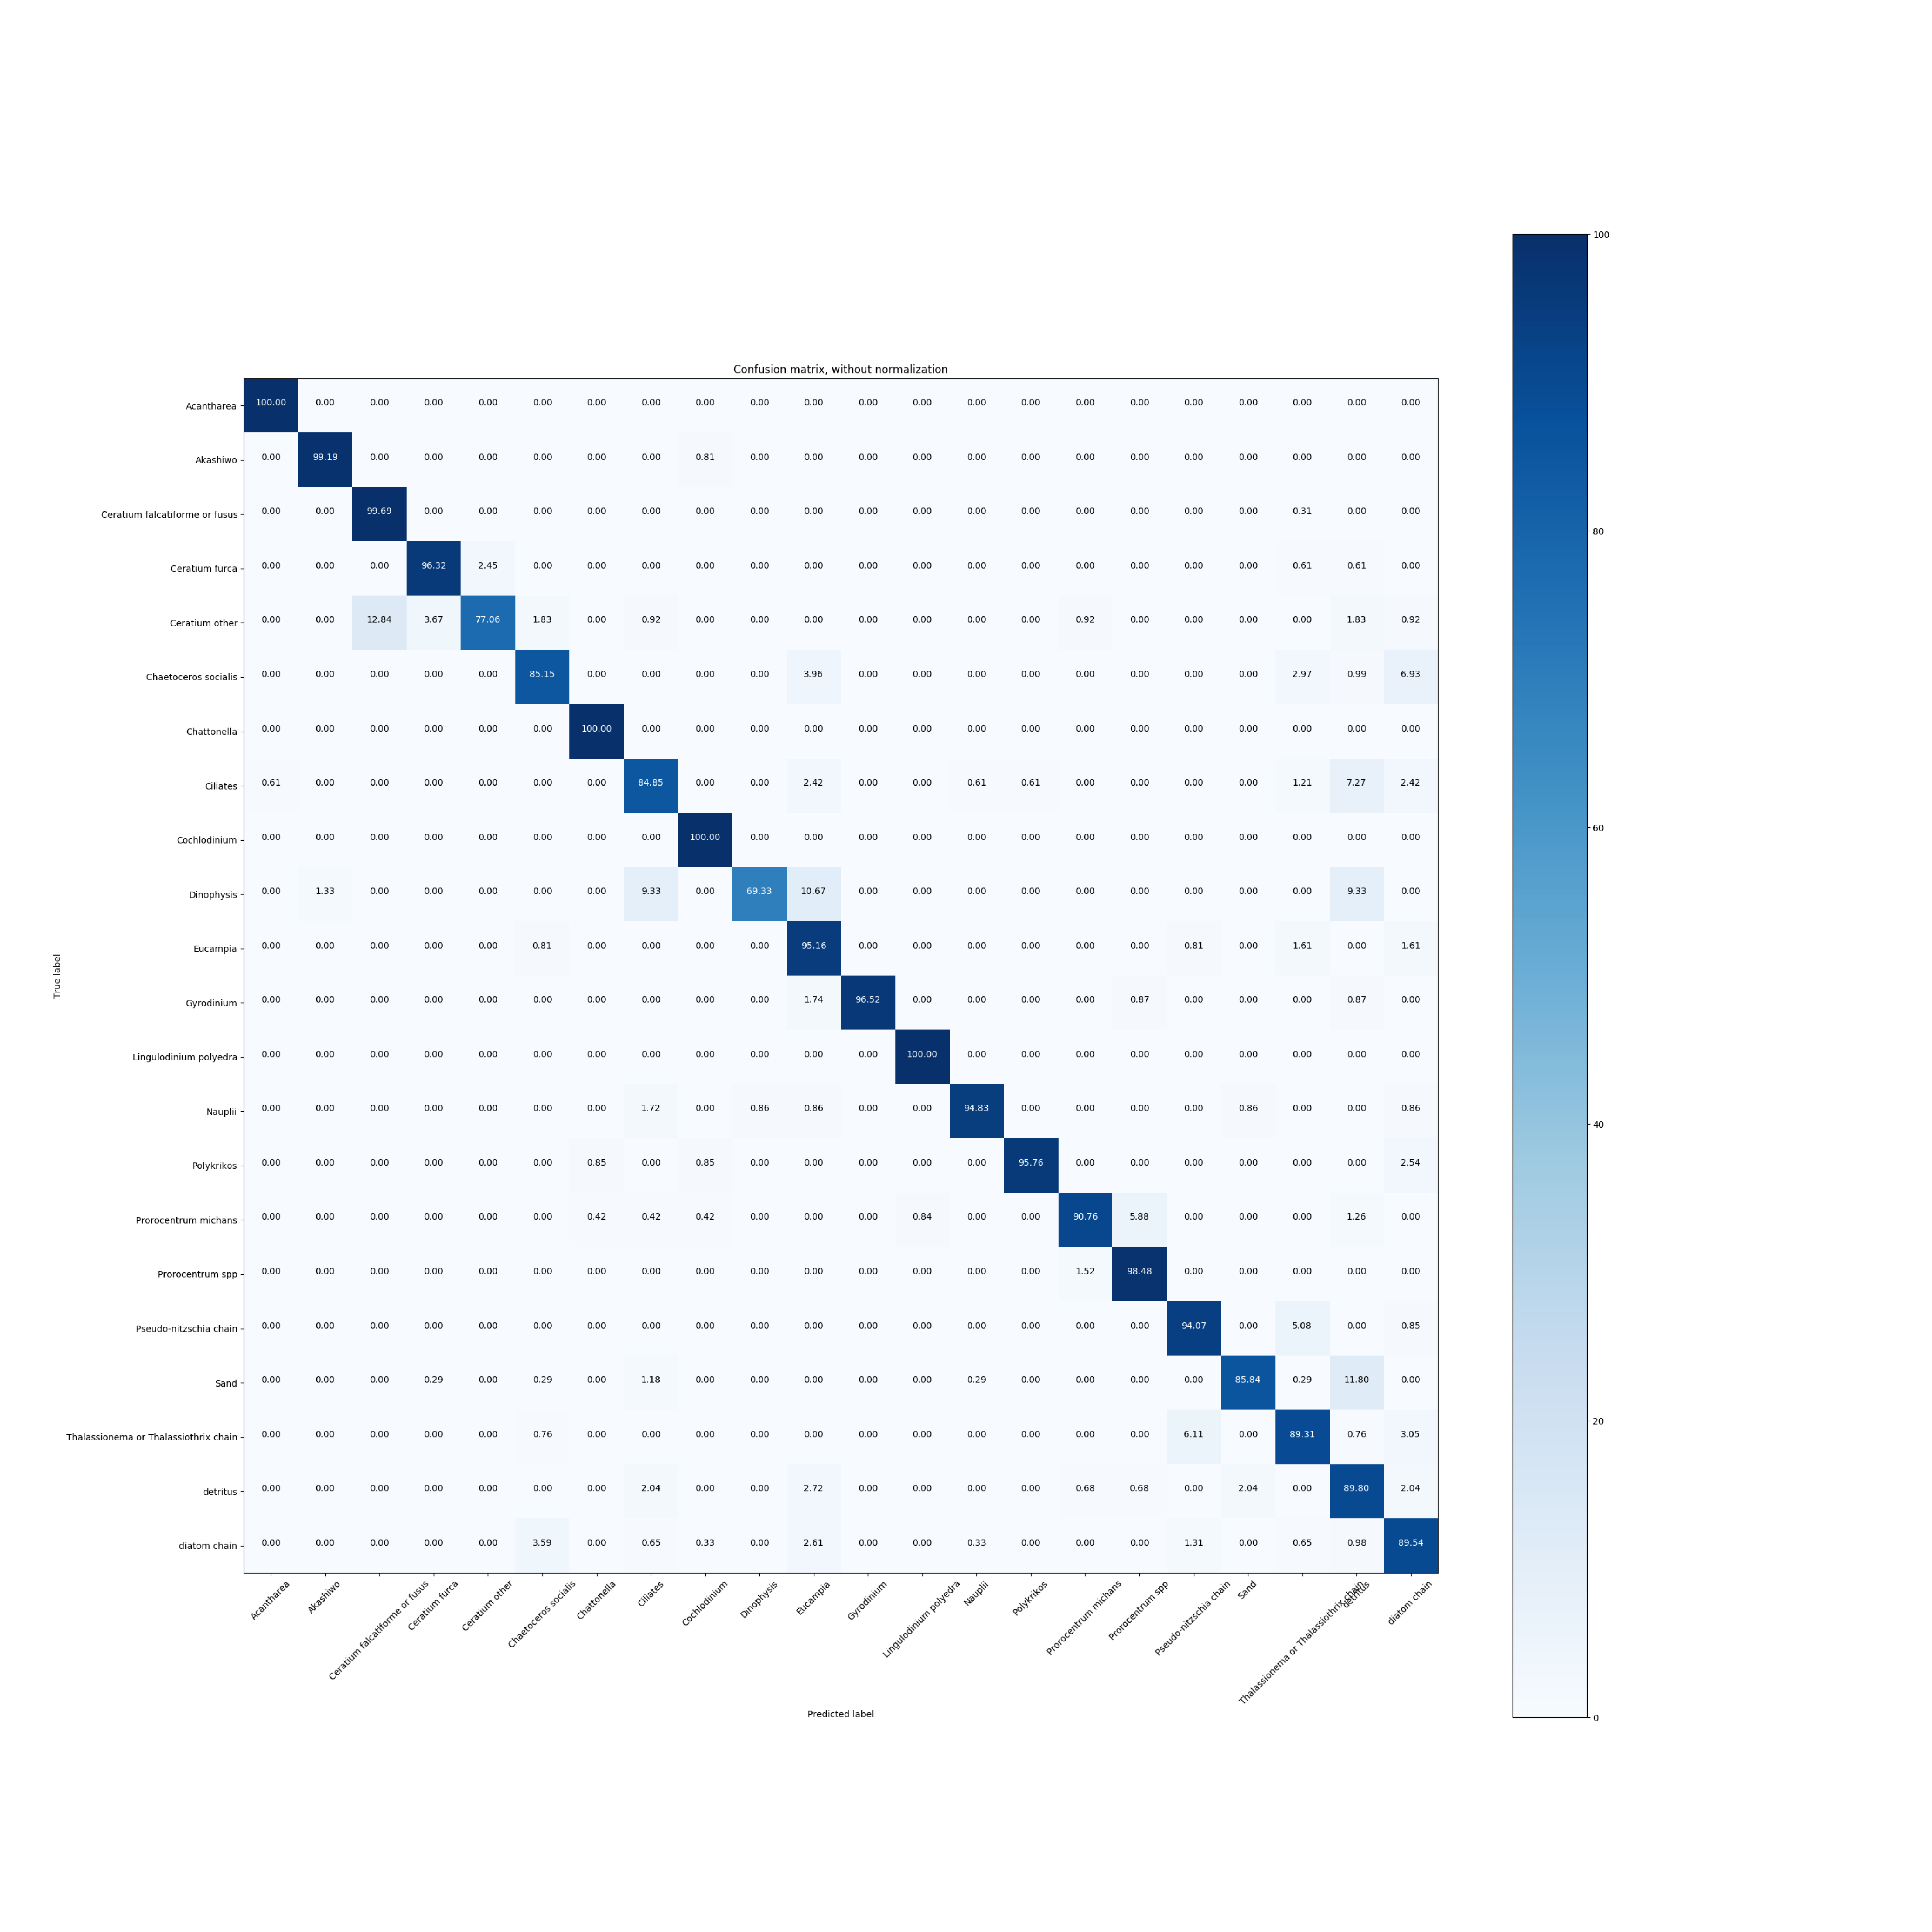

In [35]:
report.show_val_confusion_matrix()

# 2. Evaluated Test Data

In this section, we will review our model's performance on independent test data, that's taken from either i) the pier camera or ii) lab (flow-through) camera.

We first start by reviewing the dataset statistics, then dive into the quantitative and qualitative results of the model's performance.

## 2.1 Test dataset statistics

This independent test set was taken from:
- camera: pier
- date & time: {start: 5/23/2019 9:53:00, end: 5/23/2019 10:27:00} (elapsed time: 34 min)
- size range: {min length: 0.03, max length: 0.1}

Quicklinks to test set counts:

https://docs.google.com/spreadsheets/d/1h2Y5dsFaCUDWBUHW7L3NlOJ55PrR_FP6zBjPi_TzztI/edit#gid=1744856877

https://docs.google.com/spreadsheets/d/16vsz4nRc5rTUV-T3uEgUiVl5RYMD7PmAfFwKcCRv_xQ/edit#gid=1744856877

In [36]:
# show test statistics

#### NOTES:
To reduce labeling efforts, we've created this test set by labeling 9 species of interest, where anything that is "Other" than these species, is mapped to --> "Detritus".
Below is the class list for this test set.


| Species of Interest            | Detritus                              |
|--------------------------------|---------------------------------------|
| Akashiwo                       | Acantharea                            |
| Ceratium falcatiforme or fusus | Ceratium other                        |
| Ceratium furca                 | Chaetoceros socialis                  |
| Chattonella                    | Ciliates                              |
| Cochlodinium                   | Dinophysis                            |
| Gyrodinium                     | Eucampia                              |
| Lingulodinium polyedra         | Nauplii                               |
| Prorocentrum micans            | Polykrikos                            |
| Pseudo-nitzschia chain         | Prorocentrum spp                      |
| - - -                               | Sand                                  |
| - - -                              | Thalassionema or Thalassiothrix chain |
| - - -                              | detritus                              |
| - - -                               | diatom chain                          |                                         

## 2.2 Model Performance on Test dataset

### 2.2.1 Quantitative Results

In [37]:
report.show_prediction_statistics()
print()
printmd('Test Accuracy: {}%'.format(report.get_acc()[0]*100))


********************************* Predictions **********************************
Idx. Cls						Gtruth		Predictions
 1. Akashiwo                                              27		   35
 2. Ceratium furca                                         1		    2
 3. Cochlodinium                                          14		  123
 4. Gyrodinium                                            23		   13
 5. Lingulodinium polyedra                               207		  241
 6. Prorocentrum michans                                 689		  912
 7. detritus                                            1697		 1298



Test Accuracy: 81.64033107599698%

#### Test Set Confusion Matrix Analysis

- Classifier is succesfull in picking up our species of interest if they are present within the dataset and not if not present.

**Ceratium falcatiforme or fusus, Chattonella, and Pseudo-nitzchia Chains** are not present and classifier does not make false predictions for them being not present.

- Class with most false predictions: Gyrodinium (class acc: 34.78%). Classifier often mistakes Prorocentrum micans and "detritus" for this class ~ 43.48% and 21.74% false predictions respectively.

Implications: Given that the classifier scored a 90%+ class accuracy for Gyrodinium, this suggests that our training Prorocentrum micans and "detritus" images shares a common a feature with the test Gyrodinium images, causing the misclassification. Our overall accuracy is low, presumably because of this class.

- Classes above 90% class accuracy: Akashiwo (92.59%), Ceratium furca (100%), Cochlodinium (100%), Lingulodinium Polyedra (99.52%), Prorocentrum micans (93.76%)

Implications: Given that the classifier performed fairly well for 8/9 of the species of interest, this suggests that the classifier's generalization to this particular test set is robust.

- "Detritus" class generally is mistaken for Prorocentrum micans and Cocholodinium.

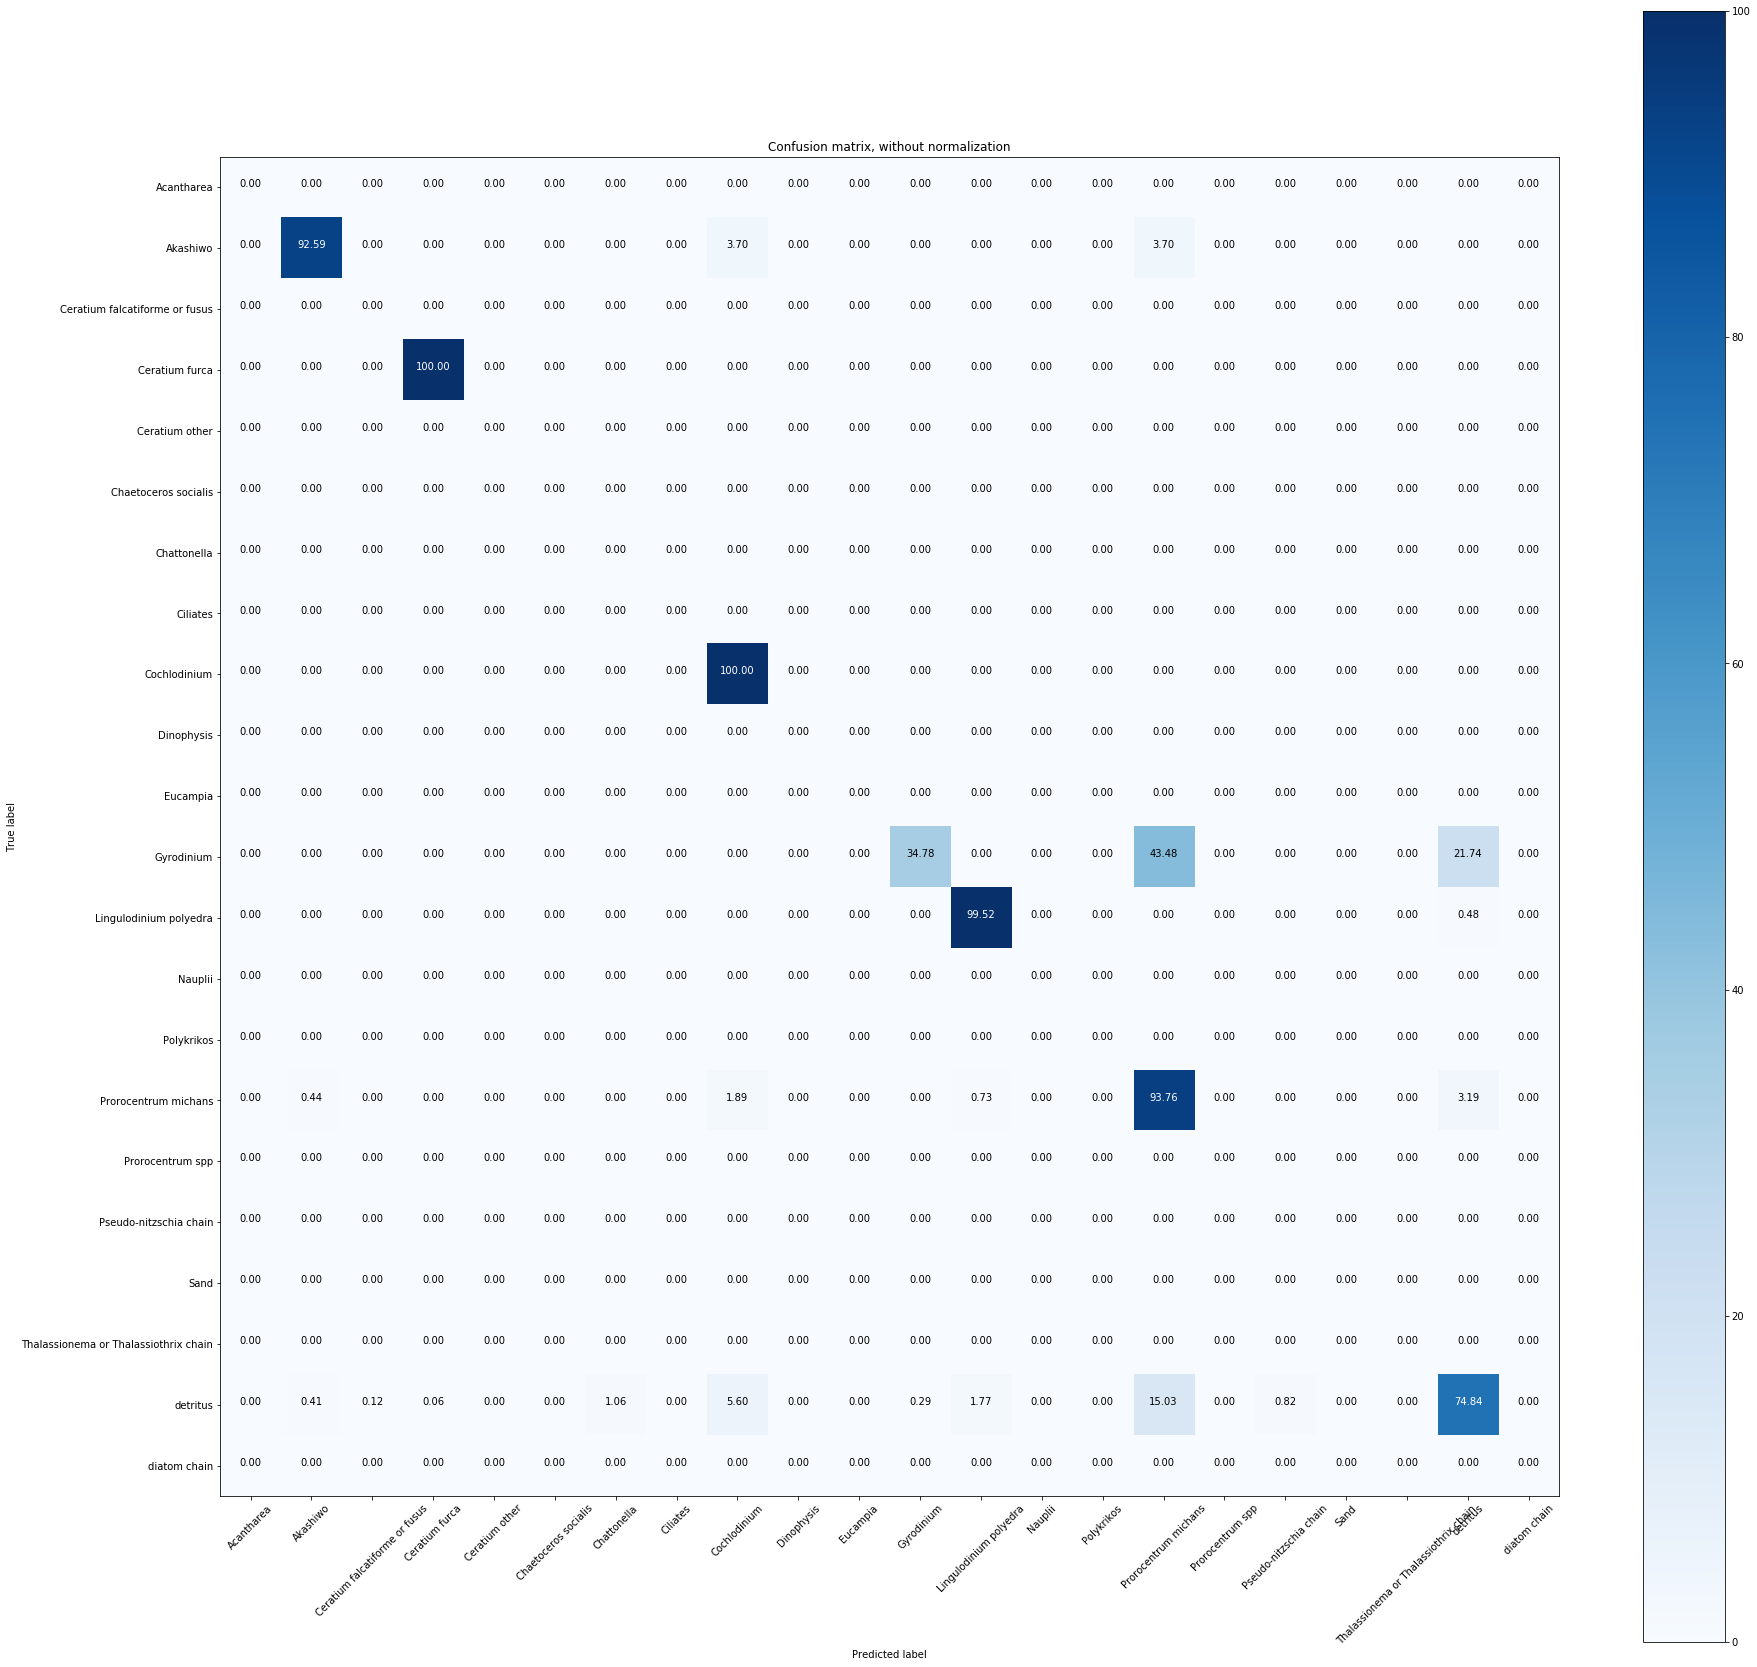

In [38]:
report.show_confusion_matrix()

### 2.2.2 Qualitative Results
We provide qualitative observations of the model's performance on the test set.
As mentioned before, these images were labeled by our trained professional and true expert taxonomists using the SPC/Lab annotation tool.


#### How to review images
- Images are grouped by their classes and separated by asterik marks, similar to the following

```*********************************** Akashiwo ***********************************```

- Each set of images is randomly sampled from its respective class's sample size. All images are presented if the class has less than 40 images (5 rows, 8 col).
- Yellow highlighted boxes indicate **correct predictions** made by the classifier
- Red highlighted boxes indicate **incorrect predictions** made by the classifier

#### Analysis

- Gyronidinium's misclassifications makes logical sense, since it shares the triangular morphology with the Prorocentrum micans. They also can share a similarity in color of the yellowness depending on the orientation.

- Overlapping double cell Prorocentrum micans seem to be an edge case type of classification, that the classifier is missing. Classifier mistakes for Cochlodiniums, which also makes sense due to the similarity of having multiple cells.

- When classifying "Detritus", depending how blurry and distinguishable the shape of the object is, the classifier may mistake it for a Prorocentrum micans. From the examples, we see that the classifier is able to pick up on the outline of the object, given a light degree of bluriness. 


*********************************** Akashiwo ***********************************


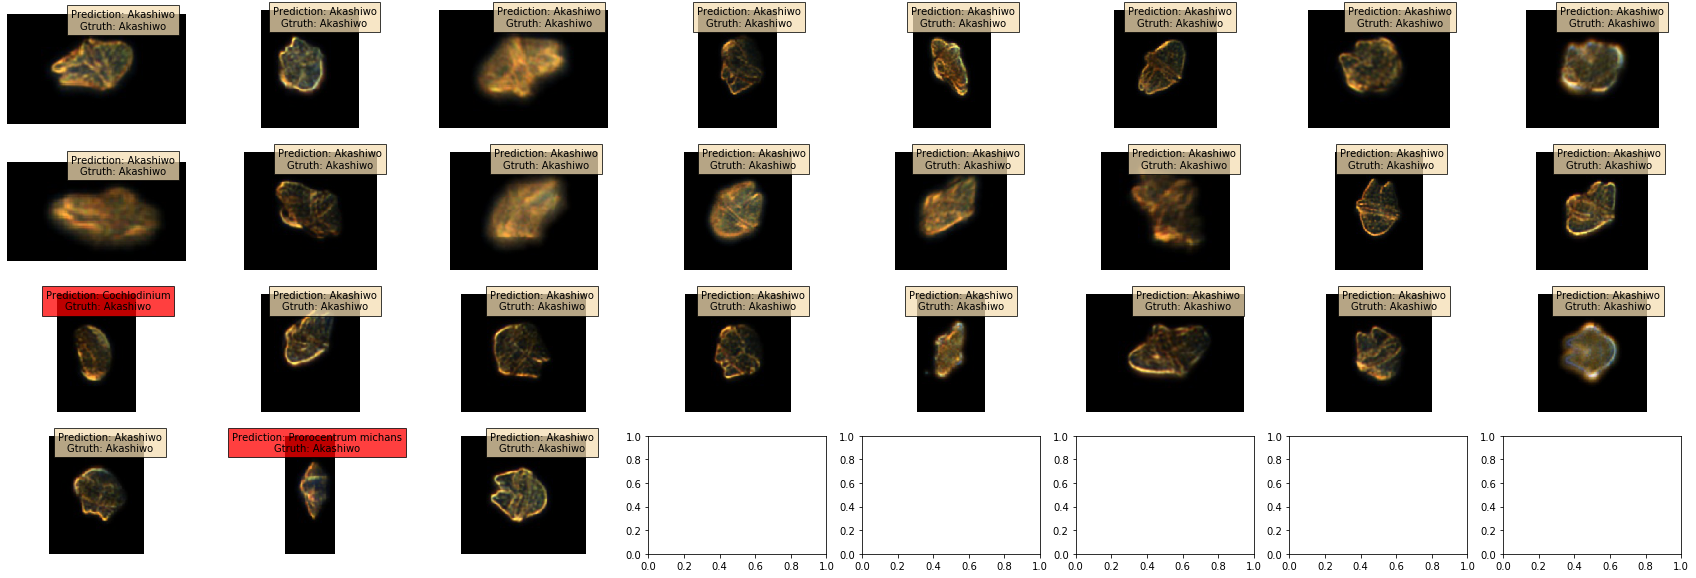


******************************** Ceratium furca ********************************


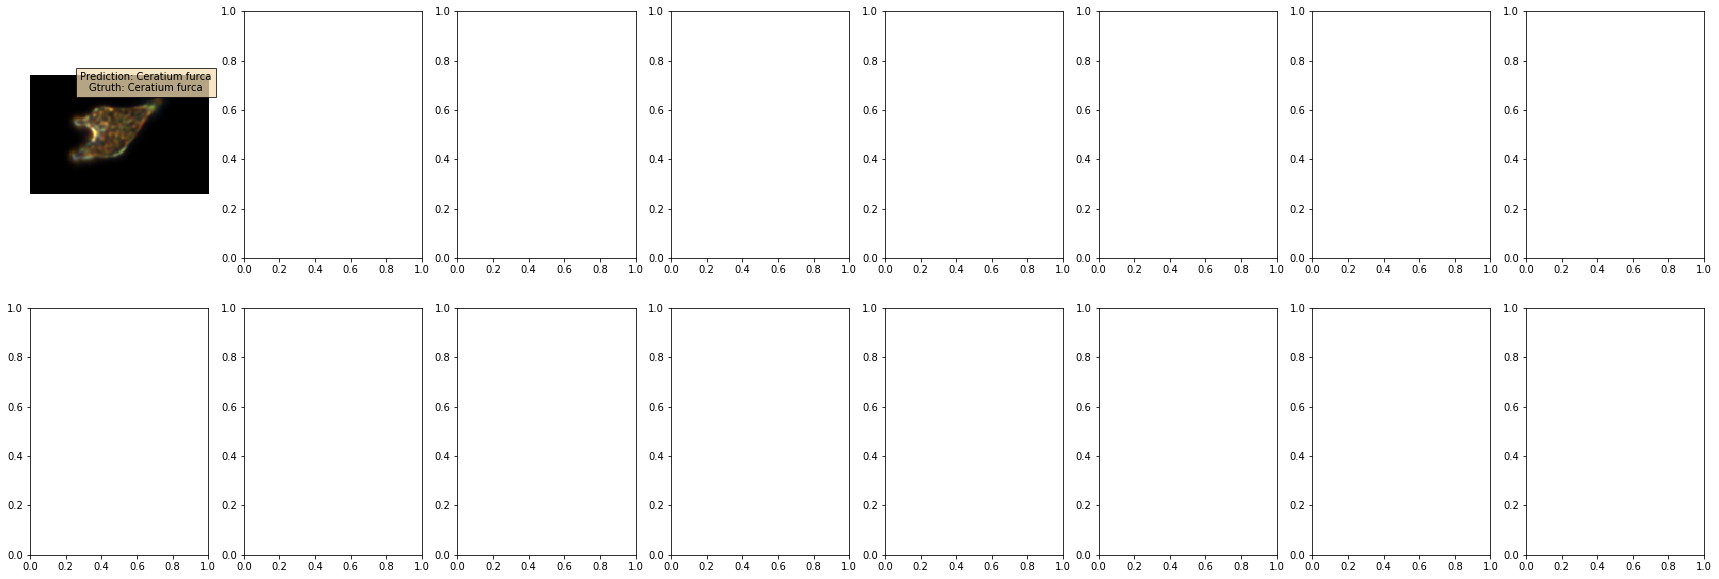


********************************* Cochlodinium *********************************


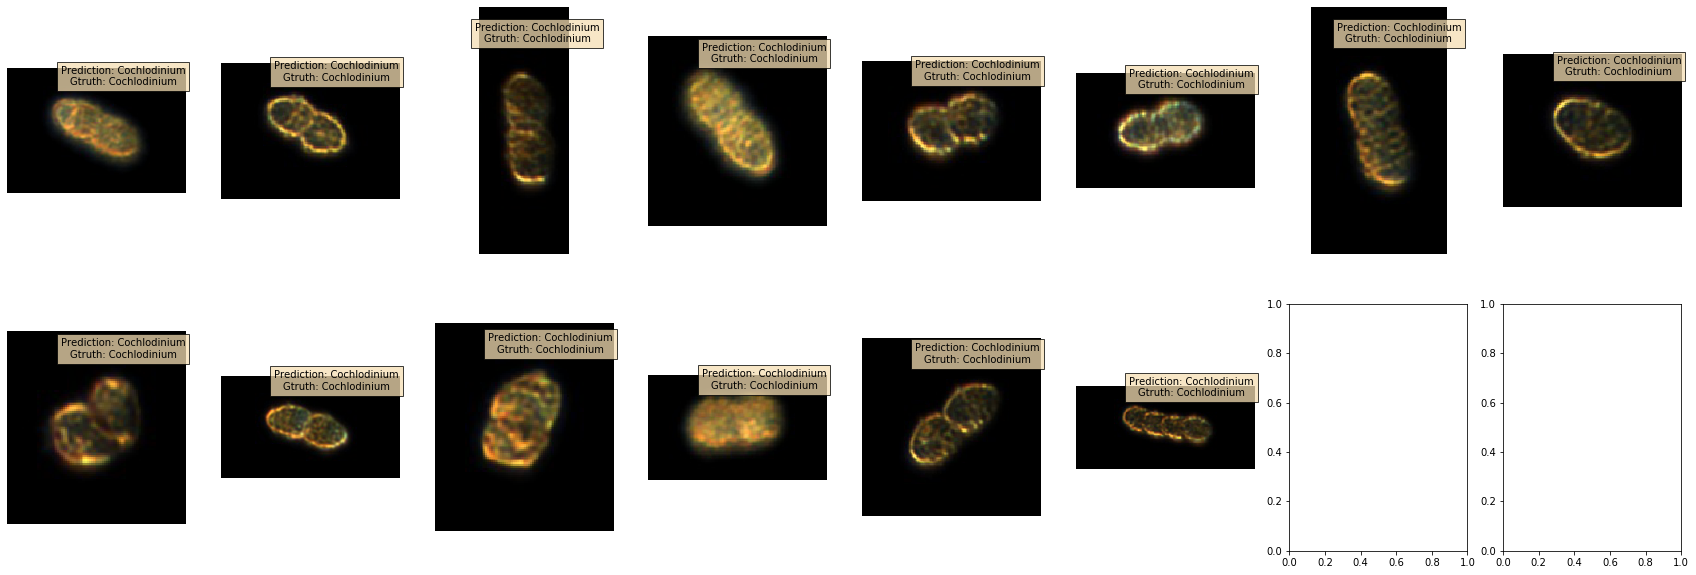


********************************** Gyrodinium **********************************


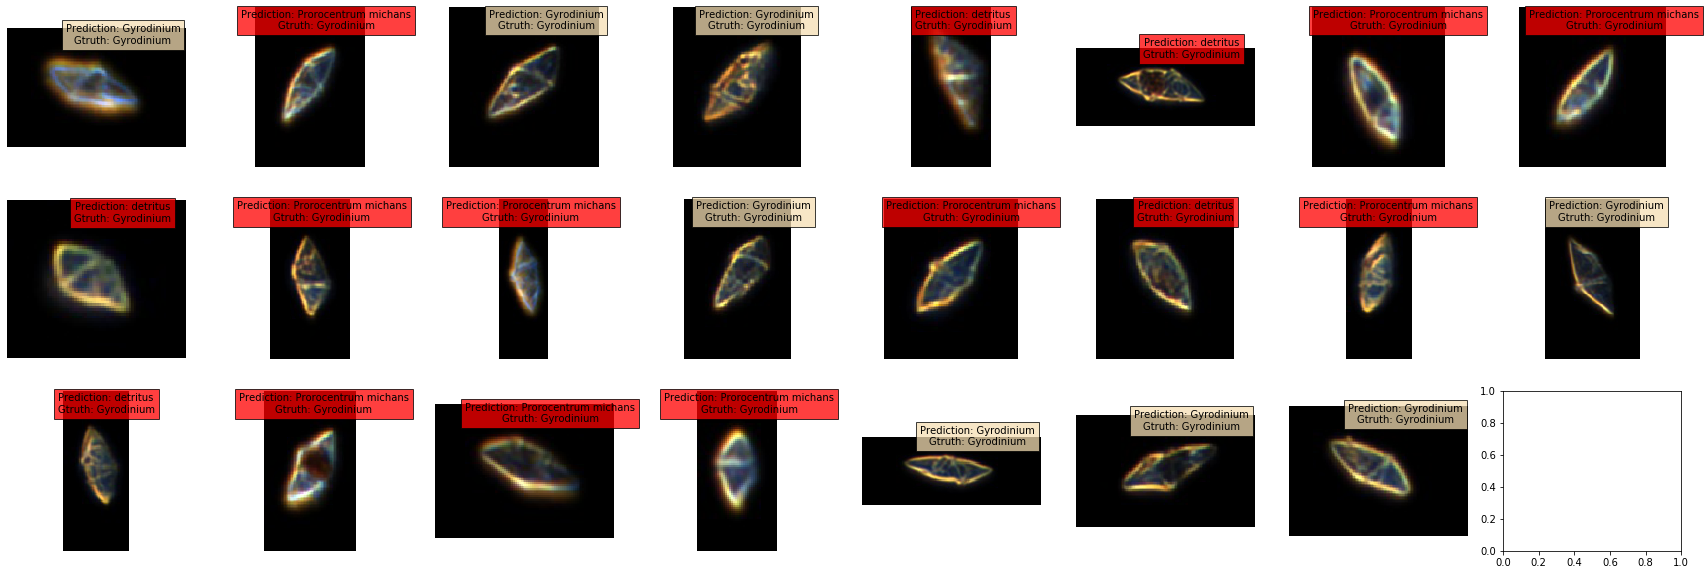


**************************** Lingulodinium polyedra ****************************


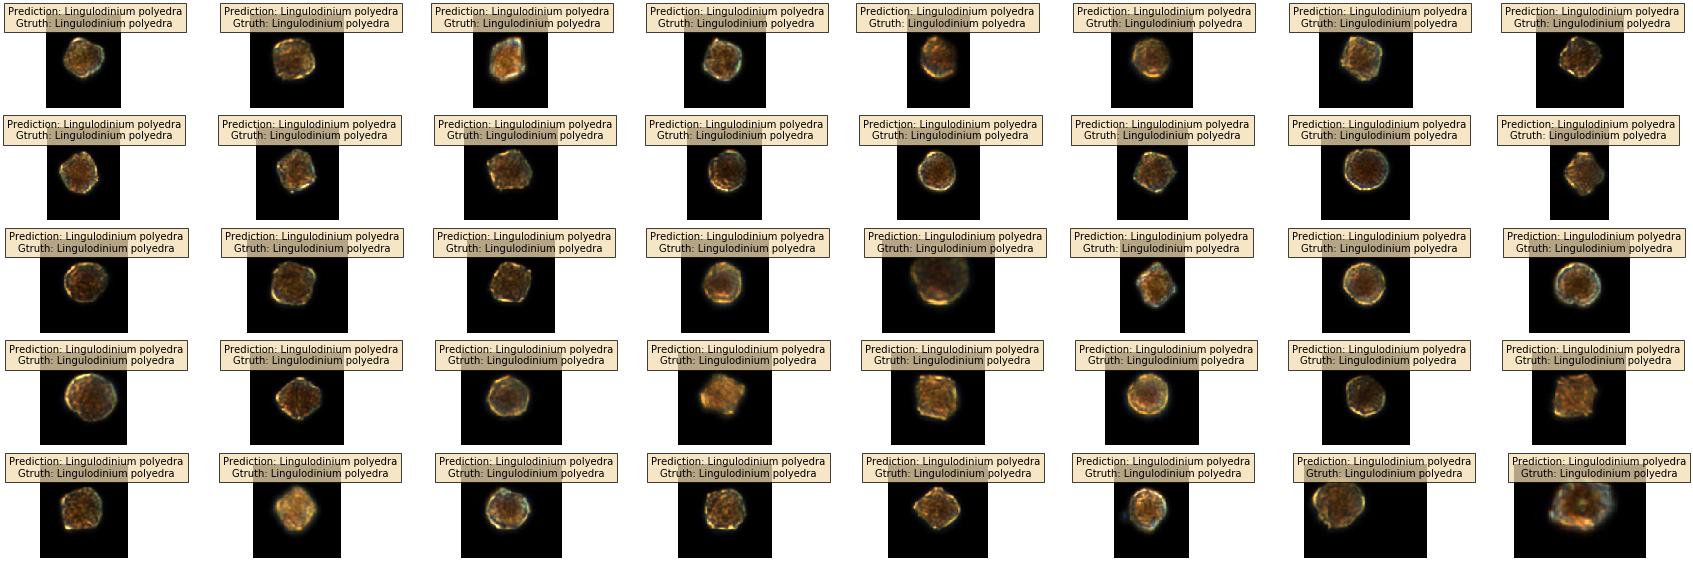


***************************** Prorocentrum michans *****************************


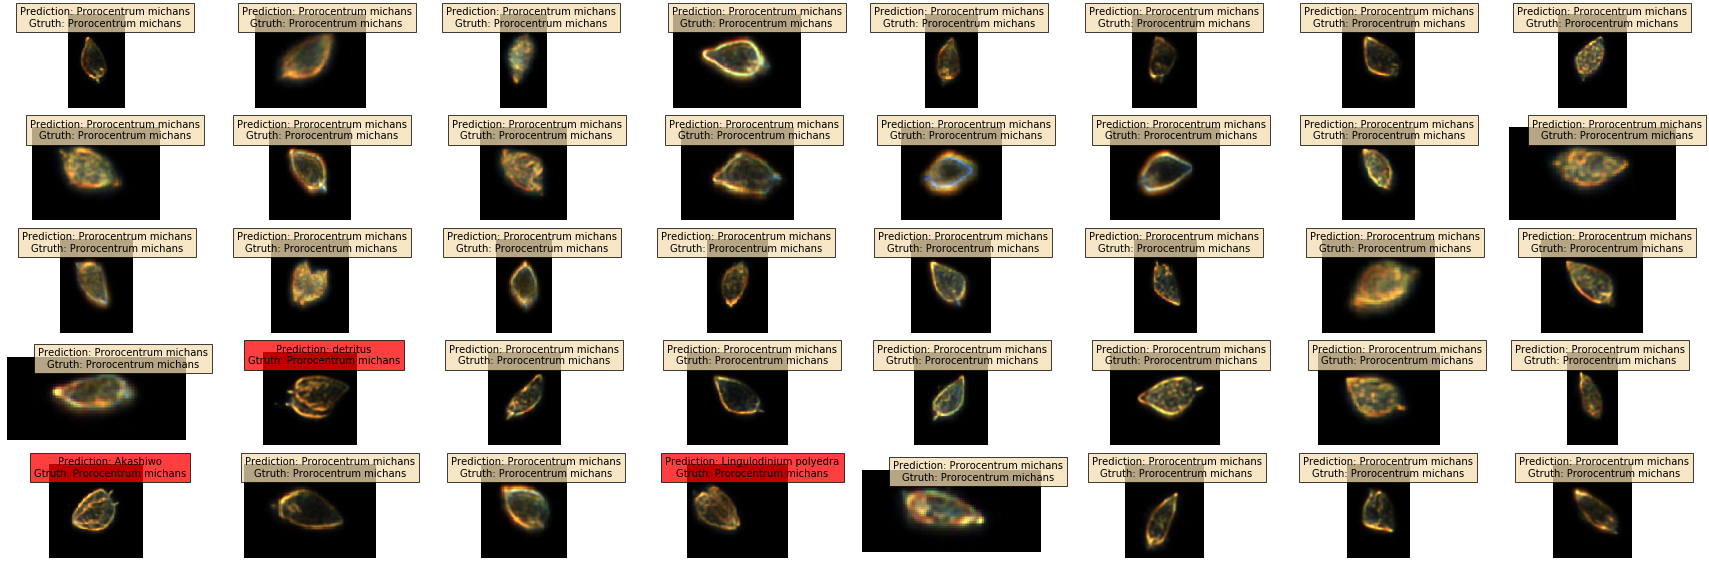


*********************************** detritus ***********************************


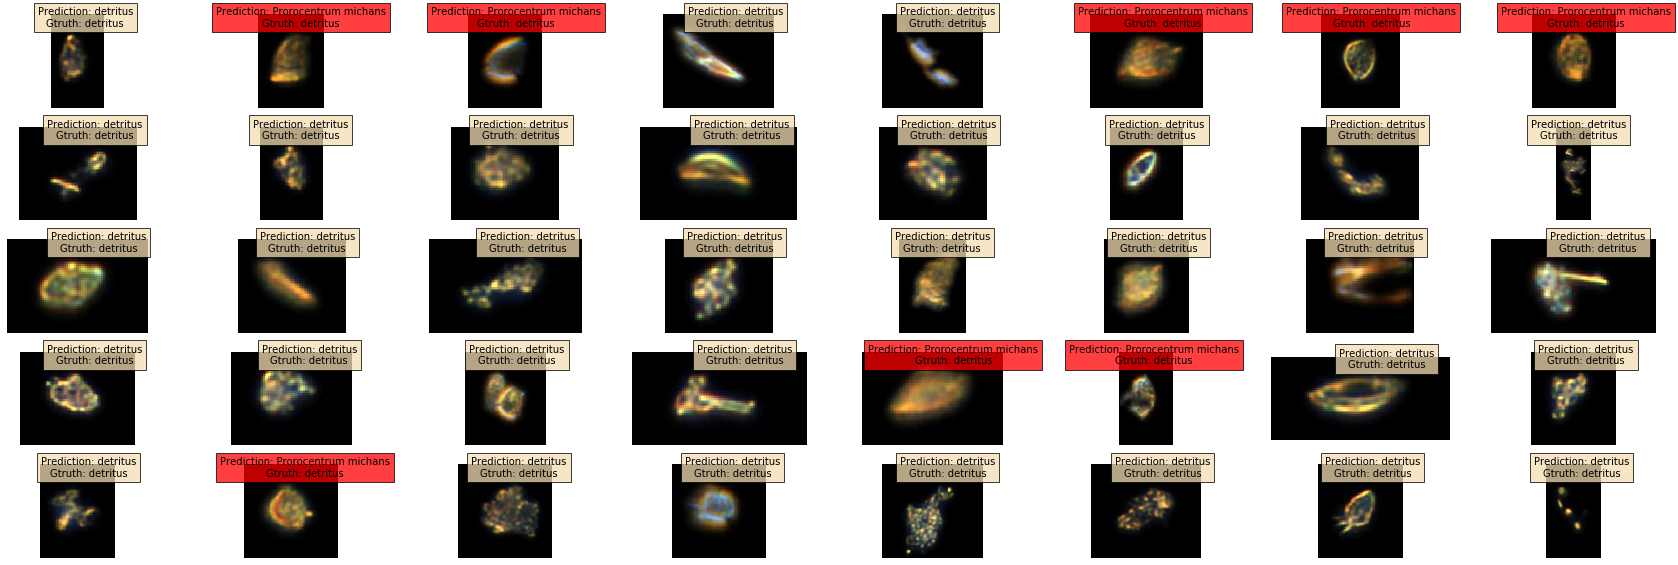

In [39]:
report.show_misclassifications()

# 3. Conclusions

- Classifier seems to do well upon this independent test set, suggesting that the general class representation, based off the training set, seem to match what is found in our unseen data.
- If certain classes can share common morphologic features, depending on the orientation, the classifier seems to base its predictive power off the color brightness and saturation of the object. This can be seen from the mistaken Gyrodinium predictions for Prorocentrum micans.
